# Carbon Emissions vs Population

This README.md lists project members, goals, responsibilities, and a summary of the files in the repository.

### Goals: 
    - Given the population for 5 regions West, Mid West, South West, South East, North East does the population influence carbon emissions?
    
### Project Members: 
   - [Laurent Mundell](https://github.com/LaurentStar)
   - [Lidet Alemu](https://github.com/Lidetsal)

### Table of Contents
    -Imports
    -Data Sources
    -Methods/Globals/Constants
    -Data Prep
    -Explore/Visual Data
    -Hypothesis Test I
    -Hypothesis Test II
    -Hypothesis Test III
    -Confident Interval

# Imports

In [1]:
from itertools import combinations
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle 
import requests
import seaborn as sns
from scipy import stats

%matplotlib inline

# Data Sources

   - [_**How States were catagorized**_](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf)
   - [_**U.S. Energy Information Administration (eia) API**_](https://www.eia.gov/opendata/qb.php?category=2251604)


# Methods/Globals/Constants 

In [131]:
%run -i "scripts//methods.py"
%run -i "scripts//global_constants_attributes_script.py"
%run -i "scripts//global_attributes_script.py"

# Data Prep

In [132]:
%run -i "scripts//data_prep.py"

# Explore/Visual Data

In [133]:
#Quick look at data statistics
display(df.describe())
print('Carbon Emission Statistics')

display(population_df.describe())
print('Population Statistics by year')

,Carbon_Emissions
count,50.000000
mean,4028.287053
std,4105.222559
min,221.872472
25%,1486.955987
50%,2854.111233
75%,4798.352589
max,24307.492673


Carbon Emission Statistics


2,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
mean,1.669055e+07,1.681237e+07,1.692823e+07,1.705184e+07,1.717688e+07,1.730043e+07,1.740994e+07,1.750112e+07,1.758426e+07
std,4.514828e+07,4.548905e+07,4.581248e+07,4.615977e+07,4.651384e+07,4.686290e+07,4.717165e+07,4.742897e+07,4.766528e+07
min,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,5.842150e+05,5.789310e+05,5.776010e+05,5.787590e+05
25%,1.852394e+06,1.855980e+06,1.862438e+06,1.871863e+06,1.878970e+06,1.886968e+06,1.891211e+06,1.895283e+06,1.898843e+06
50%,4.735532e+06,4.766471e+06,4.797080e+06,4.832708e+06,4.872142e+06,4.910746e+06,4.947877e+06,4.985918e+06,5.025950e+06
75%,9.693802e+06,9.786393e+06,9.860768e+06,9.930608e+06,9.956698e+06,1.000163e+07,1.004689e+07,1.008346e+07,1.011216e+07
max,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08


Population Statistics by year


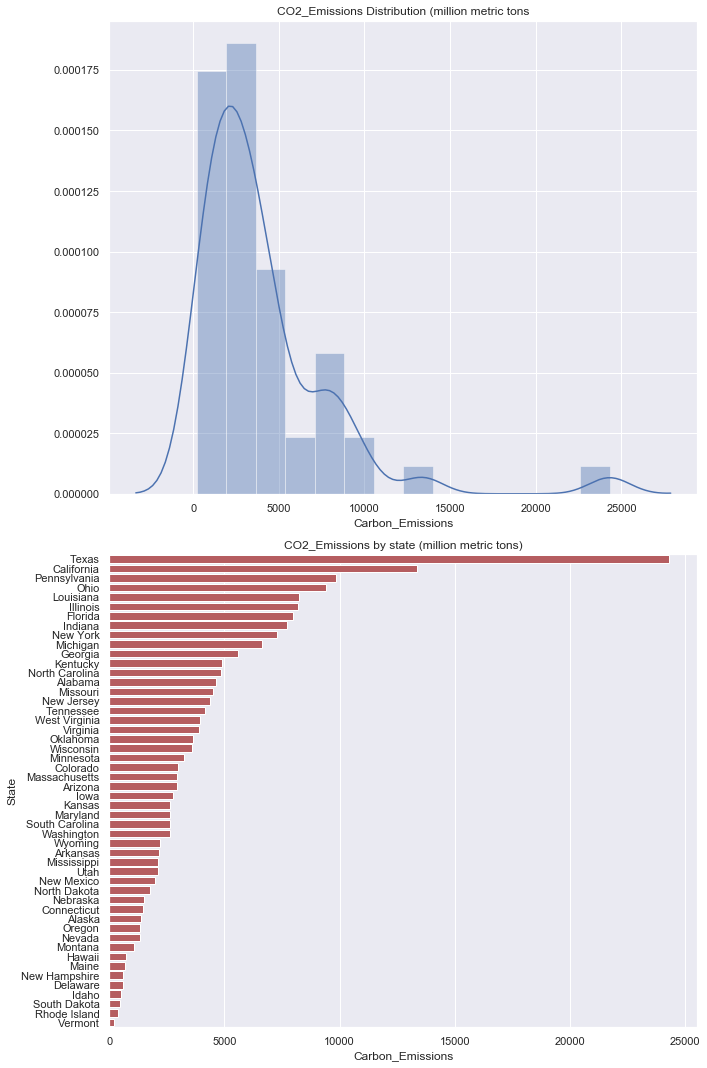

In [125]:
%run -i "scripts//visuals_data_exploring.py"

# Hypothesis Tests

#### nCk 5 choose 2 combinations of the 'Two Sample T Test'
We compare each regions carbon emissions
    
    Regions: 
        south_east
        north_east 
        mid_west
        west_coast 
        south_west

In [ ]:
se = df[df['Region'] == 'south_east']['Carbon_Emissions'].to_numpy()
ne = df[df['Region'] == 'north_east']['Carbon_Emissions'].to_numpy()
mw = df[df['Region'] == 'mid_west']['Carbon_Emissions'].to_numpy()
wc = df[df['Region'] == 'west_coast']['Carbon_Emissions'].to_numpy()
sw = df[df['Region'] == 'south_west']['Carbon_Emissions'].to_numpy()

regions = ['se', 'ne', 'mw', 'wc', 'sw']
nCk_regions = list(combinations(regions, 2))
hypothesis = []

for region_pair in nCk_regions:
    a = region_pair[0]
    b = region_pair[1]
    exec(f"hypothesis.append((stats.ttest_ind({a}, {b}), {region_pair}))")

In [ ]:
hypothesis